# Тема: "Обнаружение мошенничества при онлайн-платежах"

**Описание проекта**

---
Сегодня банковский сектор развивается в условиях цифровизации и внедрения ИИ. Основной задачей банков является повышение доступности финансовых услуг для населения и бизнеса через развитие онлайн обслуживания. Однако киберугрозы по-прежнему представляют собой одну из основных внешних угроз для финансовой системы. Банкам важно сохранять баланс между удобством, безопасностью и соблюдением регуляторных требований.

---
**Цель:** \
Проанализировать паттерны финансового поведения клиентов и выявить аномалии, связанные с потенциально мошенническими операциями, используя датасет онлайн-платежей.\
**Задачи:**

1.   Подготовка данных.
2.   Проведение исследовательского анализа данных.
3.   Выполнение статистического анализа.
4.   Визуализаци и графическая интерпретация данных.
---

**Дата сет:** https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection \
**Поля:**

*   *step* - представляет собой единицу времени, где 1 шаг равен 1 единице времени
*   *type* - тип онлайн-транзакции
*   *amount* - сумма транзакции
*   *nameOrig* - клиент, начинающий транзакцию
*   *oldbalanceOrg* - баланс до транзакции
*   *newbalanceOrig* - баланс после транзакции
*   *nameDest* - получатель транзакции
*   *oldbalanceDest* - начальный баланс получателя до транзакции
*   *newbalanceDest* - новый баланс получателя после транзакции
*   *isFraud* - флаг мошенническая транзакция
*   **isFlaggedFraud* - флаг обнаружена ли мошенническая транзакция (нашли новый столбец в процессе предобработки данных)

Набор данных от Джайнила Шаха \
Данные были собраны на сайте medium.com Аманом Харвалом.


# **1. Предобработка данных**




**1.0. Импорт библиотек и выгрузка данных.**

---



Импортируем библиотеки

In [ ]:
import kagglehub
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from scipy.stats import chi2_contingency
from matplotlib.ticker import PercentFormatter

pd.set_option('display.float_format', '{:.2f}'.format)

Выгружаем датасет из  Kaggle

In [ ]:
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
df = pd.read_csv(f"{path}/onlinefraud.csv")

#df = pd.read_csv('/content/sample_data/onlinefraud.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


**1.1. Познакомьтесь с данными: первые строки, последние строки, случайная
выборка строк, атрибуты датафрейма, информация о датафрейме, типы данных,
количество ненулевых значений, использование памяти и т.д.**

---



Просмотр первых строк датасета

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


Просмотр последних строк датасета

In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.00,C873221189,6510099.11,7360101.63,1,0


Просмотр 5 случайных строк

In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4858077,348,PAYMENT,11247.12,C1587909585,0.00,0.00,M404432539,0.00,0.00,0,0
5290590,373,TRANSFER,58310.33,C535707230,0.00,0.00,C11967243,1283542.86,1341853.19,0,0
5418137,378,CASH_IN,302926.90,C1230208854,30862.00,333788.90,C555928746,2631551.99,2720287.16,0,0
6080579,520,PAYMENT,30153.31,C983402993,12630.00,0.00,M1517567721,0.00,0.00,0,0
1778647,162,CASH_OUT,189076.79,C1689092787,14396.00,0.00,C1477979030,18355567.42,18544644.21,0,0


Метки столбцов

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Основная информация о датасете

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Типы данных столбцов

In [ ]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


Кол-во ненулевых значений

In [ ]:
df.count()

,0
step,6362620
type,6362620
amount,6362620
nameOrig,6362620
oldbalanceOrg,6362620
newbalanceOrig,6362620
nameDest,6362620
oldbalanceDest,6362620
newbalanceDest,6362620
isFraud,6362620


 Использование памяти каждым столбцом в байтах

In [ ]:
df.memory_usage(deep=True)

,0
Index,132
step,50900960
type,409895225
amount,50900960
nameOrig,429364380
oldbalanceOrg,50900960
newbalanceOrig,50900960
nameDest,429360745
oldbalanceDest,50900960
newbalanceDest,50900960


Распределение уникальных значений в целевом столбце исследования - флаг мошенничества

In [ ]:
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


Распределение уникальных значений в столбце *type*

In [ ]:
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


**1.2. Выявите проблемы в данных (при беглом просмотре). Сделайте выводы
о структуре данных, приведите выявленные проблемы.**

---



  **Дата сет df:**  
*   Cостоит из 6362620 строк и 11 полей.
*   5 полей типа float64, 3 поля типа int64, 3 поля типа object.
*   Ранее поле *isFlaggedFraud* (флаг определено ли мошенничество) не было описано в датасете и обнаружено при знакомстве с данными. Требуется дальнейшее изучение поля.
*   Просмотр первых, последних и случайных строк не указывает на проблемы с дубликами и наличием пропусков в данных.
*   Данные в целевом столбце *isFraud* несбалансированы. Требуется решить проблему, если планируется обучение модели.
*   Поля *nameOrig* — идентификатор пользователя и *nameDest* — имя получателя транзакции и *step*  не несут ценности для анализа, возможно их следует удалить.
*   Для *type* возможно стоит изменить тип на категориальный для ускорения анализа, так как набор уникальных значений ограничен.
*   Для полей-флагов *isFraud* и *isFlaggedFraud* возможно стоит поменять тип на bool для ускорения анализа и уменьшения занимаемой памяти. Но для машинного обучучения требуется вернуть обратно.



**1.3. Проверьте корректность наименований столбцов, соответствие
«змеиному регистру». Приведите наименования столбцов и весь текст в
датафрейме к единому (нижнему) регистру.**

---



Приводим названия столбцов и данные к нижнему регистру. Так как текстовые данные есть только в столбце *type*, изменяет региср данных только в нем.

In [ ]:
#df.columns = df.columns.str.lower()
def to_snake_case(data):
    data = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', data)
    return data.lower().replace(' ', '_').replace('-', '_')
df.columns = [to_snake_case(col) for col in df.columns]
df['type'] = df['type'].str.lower()
df

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
0,1,payment,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,payment,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,transfer,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,cash_out,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,payment,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,cash_out,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,transfer,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,cash_out,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,transfer,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Проверка исходных данных на наличие дубликотов

In [ ]:
df[df.duplicated()]

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud


In [ ]:
df = df.drop('name_orig', axis=1)
df = df.drop('name_dest', axis=1)
df = df.drop('step', axis=1)
df

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
0,payment,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,payment,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,transfer,181.00,181.00,0.00,0.00,0.00,1,0
3,cash_out,181.00,181.00,0.00,21182.00,0.00,1,0
4,payment,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,cash_out,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,transfer,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,cash_out,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,transfer,850002.52,850002.52,0.00,0.00,0.00,1,0


In [ ]:
df[df.duplicated()]

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
11104,payment,1849.50,0.00,0.00,0.00,0.00,0,0
14946,payment,23795.06,0.00,0.00,0.00,0.00,0,0
24990,payment,2272.05,0.00,0.00,0.00,0.00,0,0
31129,payment,1735.18,0.00,0.00,0.00,0.00,0,0
33556,payment,7759.31,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362455,cash_out,10000000.00,10000000.00,0.00,0.00,10000000.00,1,0
6362463,cash_out,0.00,0.00,0.00,0.00,0.00,1,0
6362529,cash_out,10000000.00,10000000.00,0.00,0.00,10000000.00,1,0
6362577,cash_out,10000000.00,10000000.00,0.00,0.00,10000000.00,1,0


**1.4. Проверьте датафрейм на пропуски. Заполните пропущенные значения.
Для каждой замены укажите, почему пропущенные значения заполняются именно
таким образом. (NB! Если строки с пропусками составляют не более 5% от
общего числа строк и заполнить их не представляется возможным, в этом случае
строки можно удалить).**

---



Проверка null значений

In [ ]:
df.isnull().sum()

,0
type,0
amount,0
oldbalance_org,0
newbalance_orig,0
oldbalance_dest,0
newbalance_dest,0
is_fraud,0
is_flaggedfraud,0


In [ ]:
df = df.dropna(how='any')

**1.5. Измените типы данных в столбцах, где это необходимо, объясните
изменения.**

---



Изменили тип данных в столбцах *is_fraud* и *is_flaggedfraud* на bool, а для *type* на тип category. Изменение типов данных сократит занимаемую память и повысит скорость выполнения операций с этими столбцами.

In [ ]:
df['type'] = df['type'].astype('category')
df['is_fraud'] = df['is_fraud'].astype('bool')
df['is_flaggedfraud'] = df['is_flaggedfraud'].astype('bool')
df.dtypes

,0
type,category
amount,float64
oldbalance_org,float64
newbalance_orig,float64
oldbalance_dest,float64
newbalance_dest,float64
is_fraud,bool
is_flaggedfraud,bool


Проверяем, как изменилась загрузка памяти после измнениения типов данных.

In [ ]:
df.memory_usage(deep=True)

,0
Index,132
type,6363112
amount,50900960
oldbalance_org,50900960
newbalance_orig,50900960
oldbalance_dest,50900960
newbalance_dest,50900960
is_fraud,6362620
is_flaggedfraud,6362620


**1.6. Выполните поиск дубликатов в данных. Объясните наличие дубликатов
(если таковые имеются). Выполните удаление дубликатов.**

---



Проверка дубликатов

In [ ]:
df = df[~df.duplicated()]
df.duplicated().sum()

np.int64(0)

**1.7. Сделайте промежуточные выводы о проделанной работе**

---



**В результате процесса преобработки данных были получены следующие результаты:**

*   Было проведено знакоство с данными.  Дата сет состоял из 6362620 записей и 11 столбцов.
*  Был обнаруджен новый столбец *isflaggedfraud* - флаг обнаружено ли мошенничество.  
*  Выявлен дисбаланс в данных по целевому столбцу *isfraud* мошеннических операций сильно меньше.
*   Были удалены столбцы *nameOrig* и *nameDest* и *step*, так как они не несут полезной информаци для анализа.
*   Наименование столбцов и данных в столбце *type* было приведено к "змеиному регистру".
*   Пропусков в данных не было обнаружено.
*   Были изменены типы данных следующих столбцов *isflaggedfraud*, *isfraud* и *type*, что позволит ускорить процесс анализа данных. Текущее кол-во столбцов для анализа 8, кол-во строк 6_264_740.
*   Дубликатов в исходных данных не было обнаружено. Дубликаты появившиеся после удалени столбцов были удалены.
\
После этих шагов данные готовы к более глубокому изучению.

# **2. Исследовательский анализ данных**


 **2.1. Выполните индексацию по координаторам (не менее 5 различных
условий) и логическую индексацию (не менее 5 различных условий). Выведите
результаты.**

---



**Индексация по координаторам**


---



**1.** Выгрузим 10 строк из середины

In [ ]:
df.iloc[len(df)  // 2  - 5: len(df)  // 2  + 5]

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
3159399,payment,9552.77,198858.00,189305.23,0.00,0.00,False,False
3159400,cash_out,189982.26,8014.00,0.00,1347663.53,1537645.79,False,False
3159401,payment,16567.11,206631.00,190063.89,0.00,0.00,False,False
3159402,payment,3379.40,190063.89,186684.49,0.00,0.00,False,False
3159403,transfer,657944.62,15644.00,0.00,158592.18,816536.80,False,False
3159404,payment,9392.26,10169.00,776.74,0.00,0.00,False,False
3159405,payment,12079.54,22036.00,9956.46,0.00,0.00,False,False
3159406,payment,6612.94,221044.00,214431.06,0.00,0.00,False,False
3159407,payment,13237.44,316.00,0.00,0.00,0.00,False,False
3159408,payment,12259.13,5058.00,0.00,0.00,0.00,False,False


**2.** Посмотрим данные во 2 столбце

In [ ]:
df.iloc[:, 2]

,oldbalance_org
0,170136.00
1,21249.00
2,181.00
3,181.00
4,41554.00
...,...
6362615,339682.13
6362616,6311409.28
6362617,6311409.28
6362618,850002.52


**3.** Посмотрим данные с 100 по 110 строку в столбцах с 3 по 5

In [ ]:
df.iloc[100:110, 2:5]

,oldbalance_org,newbalance_orig,oldbalance_dest
100,19869.00,18997.25,0.00
101,71636.00,70600.64,0.00
102,83084.00,82020.47,0.00
103,204237.00,203217.10,0.00
104,26304.00,22244.62,0.00
105,182.00,0.00,0.00
106,0.00,0.00,51744.00
107,0.00,0.00,104209.00
108,0.00,0.00,67684.00
109,0.00,0.00,52679.00


**4.** Посмотрим данные столбца *amount*

In [ ]:
df.loc[:, ['amount']]

,amount
0,9839.64
1,1864.28
2,181.00
3,181.00
4,11668.14
...,...
6362615,339682.13
6362616,6311409.28
6362617,6311409.28
6362618,850002.52


**5.** Посмотрим данные с 100 по 110 строку в столбце *type*

In [ ]:
df.loc[100:110, 'type']

,type
100,payment
101,payment
102,payment
103,payment
104,payment
105,payment
106,cash_out
107,cash_out
108,cash_out
109,cash_out


**6.** Посмотрим данные в столбце *amount*, в строчках с флагом мошенничества *True*

In [ ]:
df.loc[df['is_fraud'] == 1, 'amount']

,amount
2,181.00
3,181.00
251,2806.00
252,2806.00
680,20128.00
...,...
6362615,339682.13
6362616,6311409.28
6362617,6311409.28
6362618,850002.52


**Логическая индексация**

---



**1.** Выгрузим и изучим все мошеннические операции. Выделим отдельный набор для анализа df_scam

In [ ]:
df_scam = df[df['is_fraud'] == 1]
df_scam

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
2,transfer,181.00,181.00,0.00,0.00,0.00,True,False
3,cash_out,181.00,181.00,0.00,21182.00,0.00,True,False
251,transfer,2806.00,2806.00,0.00,0.00,0.00,True,False
252,cash_out,2806.00,2806.00,0.00,26202.00,0.00,True,False
680,transfer,20128.00,20128.00,0.00,0.00,0.00,True,False
...,...,...,...,...,...,...,...,...
6362615,cash_out,339682.13,339682.13,0.00,0.00,339682.13,True,False
6362616,transfer,6311409.28,6311409.28,0.00,0.00,0.00,True,False
6362617,cash_out,6311409.28,6311409.28,0.00,68488.84,6379898.11,True,False
6362618,transfer,850002.52,850002.52,0.00,0.00,0.00,True,False


**2.** Выгрузим и изучим все легальные операции. Выделим отдельный набор для анализа df_legal




In [ ]:
df_legal = df[df['is_fraud'] == 0]
df_legal

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
0,payment,9839.64,170136.00,160296.36,0.00,0.00,False,False
1,payment,1864.28,21249.00,19384.72,0.00,0.00,False,False
4,payment,11668.14,41554.00,29885.86,0.00,0.00,False,False
5,payment,7817.71,53860.00,46042.29,0.00,0.00,False,False
6,payment,7107.77,183195.00,176087.23,0.00,0.00,False,False
...,...,...,...,...,...,...,...,...
6362319,payment,8634.29,518802.00,510167.71,0.00,0.00,False,False
6362320,cash_out,159188.22,3859.00,0.00,0.00,159188.22,False,False
6362321,cash_out,186273.84,168046.00,0.00,24893.67,211167.51,False,False
6362322,transfer,82096.45,13492.00,0.00,0.00,82096.45,False,False


**3.** Изучим мошеннические операции, которые были выявлены

In [ ]:
df_scam[df_scam['is_flaggedfraud'] == True]

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
2736446,transfer,4953893.08,4953893.08,4953893.08,0.00,0.00,True,True
3247297,transfer,1343002.08,1343002.08,1343002.08,0.00,0.00,True,True
3760288,transfer,536624.41,536624.41,536624.41,0.00,0.00,True,True
5563713,transfer,4892193.09,4892193.09,4892193.09,0.00,0.00,True,True
5996407,transfer,10000000.00,19585040.37,19585040.37,0.00,0.00,True,True
5996409,transfer,9585040.37,19585040.37,19585040.37,0.00,0.00,True,True
6168499,transfer,3576297.10,3576297.10,3576297.10,0.00,0.00,True,True
6205439,transfer,353874.22,353874.22,353874.22,0.00,0.00,True,True
6266413,transfer,2542664.27,2542664.27,2542664.27,0.00,0.00,True,True
6281482,transfer,10000000.00,10399045.08,10399045.08,0.00,0.00,True,True


**4.** Проверим есть ли операции, который были ложно определены как мошеннические

In [ ]:
df_legal[df_legal['is_flaggedfraud'] == True]

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud


**5.** Проверим есть ли операции мошеннические операции, после которых баланс отправителя стал отрицательным.

In [ ]:
df_scam[(df_scam['newbalance_orig'] < 0)]

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud


**2.2. Выполните сортировку данных (по различным столбцам).
Проанализируйте наибольшие и наименьшие значения, сделайте выводы в
рамках бизнес-задачи.**

---



**1.** Сделаем сортировку по столбцу *amount*, чтобы определить наименьшие и наибольшие укараденные суммы

In [ ]:
df_scam.sort_values(by='amount')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
3760289,cash_out,0.00,0.00,0.00,538547.63,538547.63,True,False
6205440,cash_out,0.00,0.00,0.00,1328472.86,1328472.86,True,False
2736447,cash_out,0.00,0.00,0.00,0.00,0.00,True,False
6362585,cash_out,0.00,0.00,0.00,267522.87,267522.87,True,False
5996410,cash_out,0.00,0.00,0.00,2921531.34,2921531.34,True,False
...,...,...,...,...,...,...,...,...
6362576,transfer,10000000.00,45674547.89,35674547.89,0.00,0.00,True,False
4441,cash_out,10000000.00,10000000.00,0.00,0.00,9941904.21,True,False
4440,transfer,10000000.00,12930418.44,2930418.44,0.00,0.00,True,False
481251,cash_out,10000000.00,10000000.00,0.00,504326.62,10342417.90,True,False


**2.** Сделаем сортировку по столбцу *type*, чтобы оппределить какие типы операций обычно используют мошенники

In [ ]:
df_scam.sort_values(by='type')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
5188043,cash_out,769619.59,769619.59,0.00,32332.95,801952.54,True,False
5956512,cash_out,70382.18,70382.18,0.00,999649.42,1070031.60,True,False
5956204,cash_out,2740879.15,2740879.15,0.00,1137372.51,3878251.66,True,False
5956202,cash_out,10000000.00,10000000.00,0.00,111802.81,10111802.81,True,False
5946942,cash_out,973805.75,973805.75,0.00,0.00,973805.75,True,False
...,...,...,...,...,...,...,...,...
1511336,transfer,861406.83,861406.83,0.00,0.00,0.00,True,False
5996397,transfer,486175.40,486175.40,0.00,0.00,0.00,True,False
5996395,transfer,19421.77,19421.77,0.00,0.00,0.00,True,False
1511328,transfer,288032.02,288032.02,0.00,0.00,0.00,True,False


**3.** Отфильтруем данные по столбцу *newbalance_dest*, чтобы посмотреть как меняются суммы на счетах мошенников

In [ ]:
df_scam.sort_values(by='newbalance_dest')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
6074075,transfer,10000000.00,12625132.51,2625132.51,0.00,0.00,True,False
3960302,transfer,806863.30,806863.30,0.00,0.00,0.00,True,False
3960300,transfer,7809301.98,7809301.98,0.00,0.00,0.00,True,False
6078200,transfer,22048.19,22048.19,0.00,0.00,0.00,True,False
6076073,transfer,242896.12,242896.12,0.00,0.00,0.00,True,False
...,...,...,...,...,...,...,...,...
695415,cash_out,1684039.12,1684039.12,0.00,32961658.25,34645697.37,True,False
6351127,cash_out,748726.81,748726.81,0.00,36292626.28,37041353.09,True,False
6282441,cash_out,766257.55,766257.55,0.00,46141756.44,46908013.99,True,False
6013665,cash_out,133632.24,133632.24,0.00,71836828.02,71970460.27,True,False


**4.** Отсортируем обнаруженные мошеннически операции по сумме

In [ ]:
df_scam[df_scam['is_flaggedfraud'] == True].sort_values(by='amount')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
6205439,transfer,353874.22,353874.22,353874.22,0.00,0.00,True,True
6281484,transfer,399045.08,10399045.08,10399045.08,0.00,0.00,True,True
3760288,transfer,536624.41,536624.41,536624.41,0.00,0.00,True,True
3247297,transfer,1343002.08,1343002.08,1343002.08,0.00,0.00,True,True
6266413,transfer,2542664.27,2542664.27,2542664.27,0.00,0.00,True,True
6351225,transfer,3171085.59,3171085.59,3171085.59,0.00,0.00,True,True
6296014,transfer,3441041.46,3441041.46,3441041.46,0.00,0.00,True,True
6168499,transfer,3576297.10,3576297.10,3576297.10,0.00,0.00,True,True
5563713,transfer,4892193.09,4892193.09,4892193.09,0.00,0.00,True,True
2736446,transfer,4953893.08,4953893.08,4953893.08,0.00,0.00,True,True


**ВЫВОДЫ:**

1.   Наибольшие суммы списаний мошенниками 10_000_000.00, наименьшие 0. Не все переводы на максимальную сумму в 10 миллионов были распознаны старой системой, так как *is_flaggedfraud* = *False*, что гооврит о ее неэффективности.
2.   После сортировки по типу транзакций можно сделать предположение, что мошеннические операции обычно происходят с *transfer*	и *cash_out*. Можно заметить, что в большеснве случаев при мошенничиских операциях списываются все деньги со счета до копеек.
3.   После сортировки по новому банансу на счетах мошенников мы видим старнные операции, в которых сумма была списана со счета отправителя, но на счет мошенника не поступила и при этом не определена старой системой, как мошенничество по флагу *is_flaggedfraud*. Суммы на счетах мошенников могут быть 0 и довольно большими 236_726_494.66.
4.   Старая система предположительно должна блокировать операции тип *transfer* выше 350тыс  

**Благодаря сортировке были найдены места в данных, которые следует изучить побробнее.**





 **2.3. Отфильтруйте строки на основе одного или нескольких условий,
отобразите отфильтрованные данные. Для фильтрации используйте метод query
(не менее 5 различных фильтров), оператор where (не менее 5 различных
фильтров) и т.д. Фильтры должны отвечать бизнес-задаче**.

---



**QUERY**

---



**1.** Изучим мошеннические операции с 0 суммой транзакции

In [ ]:
df_scam.query('amount == 0')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
2736447,cash_out,0.00,0.00,0.00,0.00,0.00,True,False
3760289,cash_out,0.00,0.00,0.00,538547.63,538547.63,True,False
5563714,cash_out,0.00,0.00,0.00,7970766.57,7970766.57,True,False
5996408,cash_out,0.00,0.00,0.00,76759.90,76759.90,True,False
5996410,cash_out,0.00,0.00,0.00,2921531.34,2921531.34,True,False
6168500,cash_out,0.00,0.00,0.00,230289.66,230289.66,True,False
6205440,cash_out,0.00,0.00,0.00,1328472.86,1328472.86,True,False
6296015,cash_out,0.00,0.00,0.00,27938.72,27938.72,True,False
6351226,cash_out,0.00,0.00,0.00,107777.02,107777.02,True,False
6362461,cash_out,0.00,0.00,0.00,1008609.53,1008609.53,True,False


**2.** Изучим транзакции, где передовилась вся сумма со счета

In [ ]:
df_scam.query('amount == oldbalance_org & amount != 0 & is_flaggedfraud == 0')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
2,transfer,181.00,181.00,0.00,0.00,0.00,True,False
3,cash_out,181.00,181.00,0.00,21182.00,0.00,True,False
251,transfer,2806.00,2806.00,0.00,0.00,0.00,True,False
252,cash_out,2806.00,2806.00,0.00,26202.00,0.00,True,False
680,transfer,20128.00,20128.00,0.00,0.00,0.00,True,False
...,...,...,...,...,...,...,...,...
6362615,cash_out,339682.13,339682.13,0.00,0.00,339682.13,True,False
6362616,transfer,6311409.28,6311409.28,0.00,0.00,0.00,True,False
6362617,cash_out,6311409.28,6311409.28,0.00,68488.84,6379898.11,True,False
6362618,transfer,850002.52,850002.52,0.00,0.00,0.00,True,False


**3.** Изучим транзакции, где переводилась не вся сумма со счета

In [ ]:
df_scam.query('newbalance_orig > 0 & is_flaggedfraud == 0')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
4440,transfer,10000000.00,12930418.44,2930418.44,0.00,0.00,True,False
60853,transfer,994453.20,1437370.87,442917.67,194812.76,665743.67,True,False
377151,cash_out,42062.82,340830.43,298767.61,398931.35,678419.64,True,False
481250,transfer,10000000.00,11861008.32,1861008.32,0.00,0.00,True,False
586311,transfer,10000000.00,19887819.06,9887819.06,0.00,0.00,True,False
...,...,...,...,...,...,...,...,...
6362528,transfer,10000000.00,11314660.84,1314660.84,0.00,0.00,True,False
6362576,transfer,10000000.00,45674547.89,35674547.89,0.00,0.00,True,False
6362578,transfer,10000000.00,35674547.89,25674547.89,0.00,0.00,True,False
6362580,transfer,10000000.00,25674547.89,15674547.89,0.00,0.00,True,False


**4.** Изуим есть ли операции со списанием суммы больше, чем доступно на счете (овердрафт)

In [ ]:
df_scam.query('amount > oldbalance_org')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
724,cash_out,416001.33,0.00,0.00,102.00,9291619.62,True,False
1911,cash_out,132842.64,4499.08,0.00,0.00,132842.64,True,False
14861,cash_out,181728.11,0.00,0.00,11397.00,184477.77,True,False
25875,transfer,1078013.76,0.00,0.00,0.00,970749.68,True,False
77745,cash_out,277970.88,0.00,0.00,0.00,277970.88,True,False
138559,transfer,1933920.80,0.00,0.00,1283762.85,3217683.65,True,False
169998,cash_out,149668.66,0.00,0.00,44170.11,193838.76,True,False
178668,cash_out,222048.71,0.00,0.00,2979.00,225027.71,True,False
200845,cash_out,454859.39,0.00,0.00,0.00,454859.39,True,False
217978,transfer,123194.95,79466.45,0.00,535933.16,263908.84,True,False


**5.** Изучим есть ли отмененные системой мошеннические операции, когда деньги остались на счету оправителя, но система не отметила их как обнаруженные

In [ ]:
df_scam.query('newbalance_dest == oldbalance_dest	& oldbalance_org == newbalance_orig & is_flaggedfraud == 0')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud
2736447,cash_out,0.00,0.00,0.00,0.00,0.00,True,False
3760289,cash_out,0.00,0.00,0.00,538547.63,538547.63,True,False
5563714,cash_out,0.00,0.00,0.00,7970766.57,7970766.57,True,False
5996408,cash_out,0.00,0.00,0.00,76759.90,76759.90,True,False
5996410,cash_out,0.00,0.00,0.00,2921531.34,2921531.34,True,False
6168500,cash_out,0.00,0.00,0.00,230289.66,230289.66,True,False
6205440,cash_out,0.00,0.00,0.00,1328472.86,1328472.86,True,False
6296015,cash_out,0.00,0.00,0.00,27938.72,27938.72,True,False
6351226,cash_out,0.00,0.00,0.00,107777.02,107777.02,True,False
6362461,cash_out,0.00,0.00,0.00,1008609.53,1008609.53,True,False


**WHERE**

---



 На остнове полученных данных о мошеннических операциях попробуем категоризировать операции для типов **transfer** и **cash_out**, так как в них происходит мошенничество. Чтобы в дальнейшем можно было анализировать поведение клиентов при выполнении операций в легальных и мошенничиских операциях. Создадим новый столбец high_risk.

**1.** Сначала определим операции, которые обнуляли счет и назовем их *zero-balance*

In [ ]:
df.loc[:, 'high_risk'] = np.where(
    ((df['type'] == 'transfer') | (df['type'] == 'cash_out')) &
    (df['is_flaggedfraud'] == 0) &
    (df['newbalance_orig'] == 0) &
    (df['oldbalance_org'] == df['amount']),
    'zero-balance',
    'normal'
)
df

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud,high_risk
0,payment,9839.64,170136.00,160296.36,0.00,0.00,False,False,normal
1,payment,1864.28,21249.00,19384.72,0.00,0.00,False,False,normal
2,transfer,181.00,181.00,0.00,0.00,0.00,True,False,zero-balance
3,cash_out,181.00,181.00,0.00,21182.00,0.00,True,False,zero-balance
4,payment,11668.14,41554.00,29885.86,0.00,0.00,False,False,normal
...,...,...,...,...,...,...,...,...,...
6362615,cash_out,339682.13,339682.13,0.00,0.00,339682.13,True,False,zero-balance
6362616,transfer,6311409.28,6311409.28,0.00,0.00,0.00,True,False,zero-balance
6362617,cash_out,6311409.28,6311409.28,0.00,68488.84,6379898.11,True,False,zero-balance
6362618,transfer,850002.52,850002.52,0.00,0.00,0.00,True,False,zero-balance


**2.** Во время исследовательского анализа были найдены попытки совершения 0 транзакций, которые могут быть расценены, как попытки протестировтаь систему мошененниками. Отметим такие операции, как подозрительные.

In [ ]:
df['high_risk'] = np.where(
    (df['amount'] == 0),
    'zero-operation',
    df['high_risk']
)
df.query('amount == 0')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud,high_risk
2736447,cash_out,0.00,0.00,0.00,0.00,0.00,True,False,zero-operation
3760289,cash_out,0.00,0.00,0.00,538547.63,538547.63,True,False,zero-operation
5563714,cash_out,0.00,0.00,0.00,7970766.57,7970766.57,True,False,zero-operation
5996408,cash_out,0.00,0.00,0.00,76759.90,76759.90,True,False,zero-operation
5996410,cash_out,0.00,0.00,0.00,2921531.34,2921531.34,True,False,zero-operation
6168500,cash_out,0.00,0.00,0.00,230289.66,230289.66,True,False,zero-operation
6205440,cash_out,0.00,0.00,0.00,1328472.86,1328472.86,True,False,zero-operation
6296015,cash_out,0.00,0.00,0.00,27938.72,27938.72,True,False,zero-operation
6351226,cash_out,0.00,0.00,0.00,107777.02,107777.02,True,False,zero-operation
6362461,cash_out,0.00,0.00,0.00,1008609.53,1008609.53,True,False,zero-operation


**3.** Во время исследователького анализа были так же найдены овердрафт операции (перевод суммы, превышающей остаток на счете). Отметим эту категорию операций подозрительными.

In [ ]:
df['high_risk'] = np.where(
    ((df['type'] == 'transfer') | (df['type'] == 'cash_out')) &
    (df['amount'] > df['oldbalance_org']) &
    (df['type'] != 'cash_in'),
    'overdraft',
    df['high_risk']
)
df.query("high_risk == 'overdraft'")

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud,high_risk
15,cash_out,229133.94,15325.00,0.00,5083.00,51513.44,False,False,overdraft
19,transfer,215310.30,705.00,0.00,22425.00,0.00,False,False,overdraft
24,transfer,311685.89,10835.00,0.00,6267.00,2719172.89,False,False,overdraft
42,cash_out,110414.71,26845.41,0.00,288800.00,2415.16,False,False,overdraft
47,cash_out,56953.90,1942.02,0.00,70253.00,64106.18,False,False,overdraft
...,...,...,...,...,...,...,...,...,...
6362313,cash_out,111963.72,4514.00,0.00,154925.27,266888.99,False,False,overdraft
6362317,cash_out,317177.48,170.00,0.00,345042.13,662219.61,False,False,overdraft
6362320,cash_out,159188.22,3859.00,0.00,0.00,159188.22,False,False,overdraft
6362321,cash_out,186273.84,168046.00,0.00,24893.67,211167.51,False,False,overdraft


**4.** Далее отметим операции, где был частичный вывод денег

In [ ]:
df['high_risk'] = np.where(
    ((df['type'] == 'transfer') | (df['type'] == 'cash_out')) &
    (df['amount'] < df['oldbalance_org']) &
    (df['newbalance_orig'] > 0),
    'partial_debit',
    df['high_risk']
)

df.query('high_risk == "partial_debit"')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud,high_risk
58,transfer,62610.80,79114.00,16503.20,517.00,8383.29,False,False,partial_debit
70,cash_out,47458.86,209534.84,162075.98,52120.00,0.00,False,False,partial_debit
71,cash_out,136872.92,162075.98,25203.05,217806.00,0.00,False,False,partial_debit
516,transfer,7206.33,24932.00,17725.67,21308.00,18161.79,False,False,partial_debit
665,cash_out,227768.63,1011466.31,783697.68,530123.48,1412484.09,False,False,partial_debit
...,...,...,...,...,...,...,...,...,...
6362528,transfer,10000000.00,11314660.84,1314660.84,0.00,0.00,True,False,partial_debit
6362576,transfer,10000000.00,45674547.89,35674547.89,0.00,0.00,True,False,partial_debit
6362578,transfer,10000000.00,35674547.89,25674547.89,0.00,0.00,True,False,partial_debit
6362580,transfer,10000000.00,25674547.89,15674547.89,0.00,0.00,True,False,partial_debit


**5.** Чтобы отделить мошеннические, но выявленные старой системой операции, выделим их в отдельную категорию.

In [ ]:
df['high_risk'] = np.where(
    (df['is_flaggedfraud'] == 1),
    'auto_blocked',
    df['high_risk']
)
df.query('high_risk == "auto_blocked"')


,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud,high_risk
2736446,transfer,4953893.08,4953893.08,4953893.08,0.00,0.00,True,True,auto_blocked
3247297,transfer,1343002.08,1343002.08,1343002.08,0.00,0.00,True,True,auto_blocked
3760288,transfer,536624.41,536624.41,536624.41,0.00,0.00,True,True,auto_blocked
5563713,transfer,4892193.09,4892193.09,4892193.09,0.00,0.00,True,True,auto_blocked
5996407,transfer,10000000.00,19585040.37,19585040.37,0.00,0.00,True,True,auto_blocked
5996409,transfer,9585040.37,19585040.37,19585040.37,0.00,0.00,True,True,auto_blocked
6168499,transfer,3576297.10,3576297.10,3576297.10,0.00,0.00,True,True,auto_blocked
6205439,transfer,353874.22,353874.22,353874.22,0.00,0.00,True,True,auto_blocked
6266413,transfer,2542664.27,2542664.27,2542664.27,0.00,0.00,True,True,auto_blocked
6281482,transfer,10000000.00,10399045.08,10399045.08,0.00,0.00,True,True,auto_blocked


Проверим все ли мошенничиские операции получили свою категорию

In [ ]:
df.query('high_risk == "normal" & is_fraud == 1')

,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud,high_risk


**2.4. В рамках бизнес-задачи постройте несколько сводных таблиц (не менее
трех). Объясните полученные результаты.**

---



**1.** Распределение количества транзакций по типам и признаку мошенничества

**Результаты:**\
Как и предполагалось мошеннические операции относятся к типам *cash_out*	и *transfer*. При этом количество операций в обоих типах транзакций практически совпадает. Возможна схема мошенничеств: перевод со счета жертвы -> вывод денег.

In [ ]:
df.pivot_table(
    index='is_fraud',
    columns = 'type',
    values='amount',
    aggfunc='count'
)

/tmp/ipython-input-54-1757403093.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


type,cash_in,cash_out,debit,payment,transfer
is_fraud,,,,,
False,1399284,2233384,41432,2053676,528812
True,0,4057,0,0,4095


**2.** Распределение обраруженных мошенничиских транзакций по типам транзакций

**Результаты:**\
Из общего количества мошеннических транзакций только 16 было обнаружено системой, что составляет менее 1%.

In [ ]:
df_scam.pivot_table(
    index='type',
    values=['is_fraud', 'is_flaggedfraud'],
    aggfunc= 'sum',
)

/tmp/ipython-input-55-4192151094.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_scam.pivot_table(


,is_flaggedfraud,is_fraud
type,,
cash_in,0,0
cash_out,0,4057
debit,0,0
payment,0,0
transfer,16,4095


**3.** Изучим частоту совершения транзакций в разных диапазонах сумм для мошеннических и легальных транзакций

**Результаты:**\
Наибольшее количество мошеннических операций сосредоточено в группах с высоким балансом.

In [ ]:
df.pivot_table(
    index='is_fraud',
    columns = pd.cut(df['oldbalance_org'], bins=[0, 1_000, 10_000, 100_000, 1_000_000, np.inf]),
    values='amount',
    aggfunc='count'
)


/tmp/ipython-input-56-3269116514.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


oldbalance_org,"(0.0, 1000.0]","(1000.0, 10000.0]","(10000.0, 100000.0]","(100000.0, 1000000.0]","(1000000.0, inf]"
is_fraud,,,,,
False,328720,444795,1794379,952285,731818
True,42,222,1424,3777,2651


**2.5. Сгруппируйте данные по определенному столбцу и вычислите
агрегатные функции (сумма, среднее, минимальное, максимальное значение)
для каждой группы (groupby + agg). Объясните полученные результаты.**

---



**Результаты:**\
Так как все мошеннические транзакции относятся к типам *cash_out* и *transfer*,  интересно проанализировать, чем отличаются суммы этих операций от легальных транзакций тех же типов. Судя по значениям, мошенники не маскируют транзакции под мелкие платежи, что позволяет быстро выводить значительные средства. *конечно нужно учитывать дисбаланс классов, возможно разбив суммы на категории

In [ ]:
df.groupby(['type', 'is_fraud'])['amount'].agg(
    ['sum', 'mean', 'min', 'max', 'median']
).dropna()

/tmp/ipython-input-57-2173527251.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['type', 'is_fraud'])['amount'].agg(


sum       mean   min         max    median
type     is_fraud                                                       
cash_in  False    236367391912.46  168920.24  0.04  1915267.90 143427.71
cash_out False    388423792980.66  173917.16  0.01  2847566.62 146946.56
         True       5467607798.49 1347697.26  0.00 10000000.00 423660.73
debit    False       227199221.28    5483.67  0.55   569077.51   3048.99
payment  False     27333637359.23   13309.62  0.02   238637.98   9702.35
transfer False    479224774079.16  906229.01  2.60 92445516.64 486521.91
         True       6065618738.67 1481225.58 63.80 10000000.00 445705.76

**2.6. Используя функции и методы библиотеки Pandas (или иных библиотек)
проведите исследовательский анализ данных, способствующий решению
поставленной бизнес-задачи. Здесь нет конкретных инструкций и заданий –
поищите интересные закономерности в данных.**

---



Так как для анализа на интересуют только типы операций *cash_out* и *transfer*, остальные исключим из выборки.

In [ ]:
df = df[df['type'].isin(['cash_out', 'transfer'])]
df['type'].value_counts()

,count
type,
cash_out,2237441
transfer,532907
cash_in,0
debit,0
payment,0


Добавим новый столбец *amount_category* для удобства анализа сумм операци. Мы разделим их на категори в зависимости от диапазона, в который они попадают:
*   Микро-платежи (0-1K)
*   Малые платежи (1K-10K)
*   Средние платежи (10K-100K)
*   Крупные платежи (100K-1M)
*   Очень крупные платежи (>1M)

In [ ]:
bins = [0, 1000, 10_000, 100_000, 1_000_000, np.inf]
labels = [
    'micro',
    'small',
    'medium',
    'large',
    'very_large'
]
df['amount_category'] = pd.cut(
    df['amount'],
    bins=bins,
    labels=labels,
    right=False
)
df

/tmp/ipython-input-59-1544937236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_category'] = pd.cut(


,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flaggedfraud,high_risk,amount_category
2,transfer,181.00,181.00,0.00,0.00,0.00,True,False,zero-balance,micro
3,cash_out,181.00,181.00,0.00,21182.00,0.00,True,False,zero-balance,micro
15,cash_out,229133.94,15325.00,0.00,5083.00,51513.44,False,False,overdraft,large
19,transfer,215310.30,705.00,0.00,22425.00,0.00,False,False,overdraft,large
24,transfer,311685.89,10835.00,0.00,6267.00,2719172.89,False,False,overdraft,large
...,...,...,...,...,...,...,...,...,...,...
6362615,cash_out,339682.13,339682.13,0.00,0.00,339682.13,True,False,zero-balance,large
6362616,transfer,6311409.28,6311409.28,0.00,0.00,0.00,True,False,zero-balance,very_large
6362617,cash_out,6311409.28,6311409.28,0.00,68488.84,6379898.11,True,False,zero-balance,very_large
6362618,transfer,850002.52,850002.52,0.00,0.00,0.00,True,False,zero-balance,large


**1.** Построим сводную таблицу и сравним, как часто встречаются операции с разными категориями риска среди мошеннических и легальных транзакций

In [ ]:
pd.pivot_table(
    df,
    index='high_risk',
    columns='is_fraud',
    values='amount',
    aggfunc='count'
).fillna(0).astype(int)

is_fraud,False,True
high_risk,,
auto_blocked,0,16
overdraft,2488605,29
partial_debit,273591,144
zero-balance,0,7952
zero-operation,0,11


**Результаты:**

*   Частичное сняти средств является вполне стандартной операцией клиентов, здесь мошеннические опрерации встречаются редко. Овердрафт операции так же явлются в большинсве случаев легальными.
*   Операции по полному выводу средств во счета являются нетипичными для данной выборки. Так же попытки вывести 0 суммы относятся только к мошенникам.\
 Таким образом мы видим некоторые поведенческие шаблоны.

**2.** Создадим сводную таблицу и проверим, отличаются ли суммы операций у мошенников и обычных клиентов

In [ ]:
pd.pivot_table(
    df,
    index='amount_category',
    columns='is_fraud',
    values='amount',
    aggfunc='count'
).fillna(0).astype(int)

/tmp/ipython-input-61-2831469116.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


is_fraud,False,True
amount_category,,
micro,7743,53
small,70820,220
medium,755842,1429
large,1799990,3798
very_large,127801,2652


**Результаты:**\
Мошенничество значительно чаще встречается в категориях large (100K–1M) и very_large (>1M) (3_798 и 2_652 операций). Операции с малыми и микросуммами практически не подвержены мошенничеству.\
Таким образом, размер транзакции является важным фактором при оценке потенциального мошенничества.

**3.** Построим сводную таблицу, чтобы проанализировать, какие комбинации рисков и сумм чаще встречаются в мошеннических и легальных операциях

In [ ]:
pd.pivot_table(
    df,
    index='high_risk',
    columns=['amount_category', 'is_fraud'],
    values='amount',
    aggfunc='count',
    fill_value=0
)

/tmp/ipython-input-62-1211171571.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


amount_category micro        small        medium          large        \
is_fraud        False True   False True    False True     False True    
high_risk                                                               
auto_blocked        0     0      0     0       0     0        0     3   
overdraft        4018     0  40877     0  609562     6  1706465    20   
partial_debit    3725     0  29943     0  146280     1    93525     1   
zero-balance        0    42      0   220       0  1422        0  3774   
zero-operation      0    11      0     0       0     0        0     0   

amount_category very_large        
is_fraud             False True   
high_risk                         
auto_blocked             0    13  
overdraft           127683     3  
partial_debit          118   142  
zero-balance             0  2494  
zero-operation           0     0

**Результаты:**\
Полное обнуление баланса явный признак мошенничества в любых суммах. Переводы на 0 рублей встречаются редко и выглядят подозрительно, возможно, это тестовые или отвлекающие операции. Частичный вывод денег тоже бывает мошенническим, особенно в средних и крупных платежах.

**2.7. Сделайте промежуточные выводы о проделанной работе.**

---



**В результате исследователького анализа данных были получены следующие результаты:**

*   Было выявлено, что все мошеннические опрации относятся к типам *transfer* и *cash_out*.
*  Старая система предположительно должна была блокировать операции типа *transfer* выше 350тыс, но было выявлено всего 16 таких операций, остальные мошеннические операции были ей проигнорированы. Что говорит о ее неэффективности.    
*  На основе исследования данных были вывлены некоторые закономерности в операциях, отмеченных, как мошеннические. Был создан столбец high_risk - описывающий следующие типы операций: overdraft - перевод с заемом денег, zero-balance - обнуление баланса при выводе денег, partial_debit - частичный вывод денег, zero-operation	- операции с 0 суммой, auto_blocked - обнаруженные старой системой.
*   Наибольшее количество мошеннических операций сосредоточено в группах с высоким балансом. Мошенники не маскируют транзакции под мелкие платежи.
*   Был суммы операций были разднны на категории для удобства и создан столбец *amout_category* :  micro - микро-платежи (0-1K), small - малые платежи (1K-10K), medium - cредние платежи (10K-100K), large - крупные платежи (100K-1M), very_large - очень крупные платежи (>1M).
*   Были выявлены некоторые закономерности в поведении клиентов при совершении легальных и мошенничиских операций. Мошенничество значительно чаще встречается в категориях large (100K–1M) и very_large (>1M) (3_798 и 2_652 операций). Полное обнуление баланса и нулевые списания явный признак мошенничества. Овердрафт операции редко подверженны мошенничеству. Операции частичного вывода средств являются стандарными, но подвержены мошенничеству в крупных суммах.

**Таким образом, выявленные паттерны риска и типовых сумм позволяют перейти к следующему этапу.**

#**3. Статистический анализ данных**

**3.1. Рассчитайте основные статистические показатели по числовым признакам: среднее значение (mean), медиану (median), моду (mode), стандартное отклонение (std), квартильное распределение (describe, quantile).**

---



Мы продолжаем анализировать данные о легальных и мошеннических операциях типа transfer и cash_out.

In [121]:
df_scam = df.query('is_fraud == 1')
df_legal = df.query('is_fraud == 0')

**1.** Среднее значение числовых признаков

In [ ]:
df[['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest']].mean()

,0
amount,317354.28
oldbalance_org,47455.28
newbalance_orig,16092.26
oldbalance_dest,1703588.67
newbalance_dest,2049591.29


**2.** Медиана числовых признаков

In [ ]:
df[['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest']].median()

,0
amount,171258.15
oldbalance_org,303.00
newbalance_orig,0.00
oldbalance_dest,555739.34
newbalance_dest,828031.31


**3.** Мода числовых признаков

In [ ]:
df[['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest']].mode()

,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest
0,10000000.00,0.00,0.00,0.00,0.00


**4.** Стандартное отклонение числовых признаков

In [ ]:
df[['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest']].std()

,0
amount,886807.41
oldbalance_org,247599.45
newbalance_orig,151257.47
oldbalance_dest,4225589.45
newbalance_dest,4676913.45


**5.** Описательная статистика

**Результаты:** \

*   amount: Средняя сумма транзакций ~317тыс, медианное занчение в 2 раза меньше ~171тыс. Большое стандартное отклонение ~887тыс скошено вправо.
*   oldbalance_org: средний баланс отправителя ~47тыс, медина 303, так же большое стандартное отклонение ~247тыс.

In [ ]:
df[['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest']].describe()

,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest
count,2770348.00,2770348.00,2770348.00,2770348.00,2770348.00
mean,317354.28,47455.28,16092.26,1703588.67,2049591.29
std,886807.41,247599.45,151257.47,4225589.45,4676913.45
min,0.00,0.00,0.00,0.00,0.00
25%,82972.51,0.00,0.00,128098.82,327285.48
50%,171258.15,303.00,0.00,555739.34,828031.31
75%,306776.01,30996.00,0.00,1735940.92,2122108.64
max,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92


**6.** Квартили

In [ ]:
df['amount'].quantile([0.25, 0.5, 0.75])

,amount
0.25,82972.51
0.50,171258.15
0.75,306776.01


**7.** Описательная статистика для мошеннических и легальных операций

**Результаты:**
*   amount: Средняя сумма транзакций ~1.4млн очень большая, значительно больше средней по всей выборке. Медианнное занчение сильно меньше среднего ~435тыс. Стандартное отклонение так же большое ~2.3млн.
*   oldbalance_org: Средний баланс отправителя ~1.5млн против общего в ~47тыс, медина ~434тыс, так же очень большое стандартное отклонение ~3.4млн.\
Мошеннические операции характеризуются более крупными суммами и балансами отправителей, чем все транзакции.


In [ ]:
df_scam[['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest']].describe()

,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest
count,8152.00,8152.00,8152.00,8152.00,8152.00
mean,1414772.64,1597832.58,193832.27,548322.14,1225299.83
std,2314054.18,3497268.98,1972937.29,3348548.68,3860518.93
min,0.00,0.00,0.00,0.00,0.00
25%,126417.50,125151.87,0.00,0.00,0.00
50%,435867.16,434204.01,0.00,0.00,0.00
75%,1487505.07,1487505.07,0.00,151407.41,1027708.87
max,10000000.00,59585040.37,49585040.37,236230516.82,236726494.66


**Результаты:** \
*   amount: Средняя сумма транзакций ~314тыс приближена к средней по выборке ~317тыс. Медианное значение в 2 раза меньше среднего и сравнимо с общим. Стандартное отклонение ~82тыс.
*   oldbalance_org: Средний баланс отправителя ~42тыс, как и общий. Медиана 283 приближена к общей медиане в 303.\
В целом суммы и балансы отправителей существенно ниже, чем у мошеннических операций.

In [128]:
df_legal[['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest']].describe()

,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest
count,2762196.00,2762196.00,2762196.00,2762196.00,2762196.00
mean,314115.50,42879.69,15567.70,1706998.18,2052024.00
std,877144.15,135200.89,106613.58,4227441.85,4678897.71
min,0.01,0.00,0.00,0.00,0.00
25%,82908.23,0.00,0.00,129982.43,328796.37
50%,171034.46,283.00,0.00,558272.99,829902.93
75%,305994.18,30790.00,0.00,1740403.81,2124570.36
max,92445516.64,43818855.30,43686616.33,356015889.35,356179278.92


**3.2. Постройте матрицу корреляций для числовых признаков. Выявите признаки с высокой корреляцией (например, выше 0.7 или ниже -0.7). Объясните, как эти взаимосвязи могут повлиять на бизнес-процессы.**

---



Построим матрицу корреляции, выберем метод Спирмена, он не требует нормальности распределения данных и устойчив к выбросам. Поэтому он подходит для анализа финансовых данных, где могут вствречаться аномально бальшие переводы.

**Результаты:**
*   Балансы отправителя (oldbalance_org, newbalance_orig) и получателя (oldbalance_dest, newbalance_dest) тесно связаны между собой, что логично, так как операции переводят деньги между счетами.
*   Корреляции с признаком мошенничества (is_fraud) очень слабые.

Также очевидно наличие мультиколлениарности, так как существует взаимосвязь между суммой перевода (amount), начальным балансом отправителя (oldbalance_org) и конечным балансом после операции (newbalance_orig).



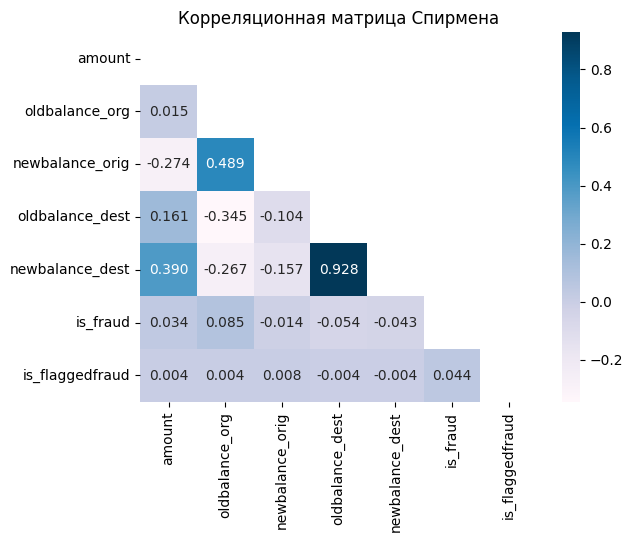

In [129]:
corr_matrix2 = df.corr('spearman', numeric_only=True)
sns.heatmap(corr_matrix2, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix2, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Корреляционная матрица Спирмена')
plt.show()

**3.3. Проведите анализ распределений числовых переменных. Постройте гистограммы или KDE-графики (Seaborn) для нескольких числовых переменных. Определите наличие выбросов, асимметрии, пиков.**

---



**1.** Построим и проанализируем гистрограммы и KDE-график числовых призанов amount, newbalance_ori', oldbalance_org, newbalance_dest, oldbalance_dest для типов операций.

**Результаты:**\
Распределение всех числовых признаков асимметрично. Имееют длинный правый хвост. Большинство значений сосредоточены в нижнем диапазоне (пики около нуля), крупные суммы редкие. Встречаются небольшие выбросы в районе 10млн.

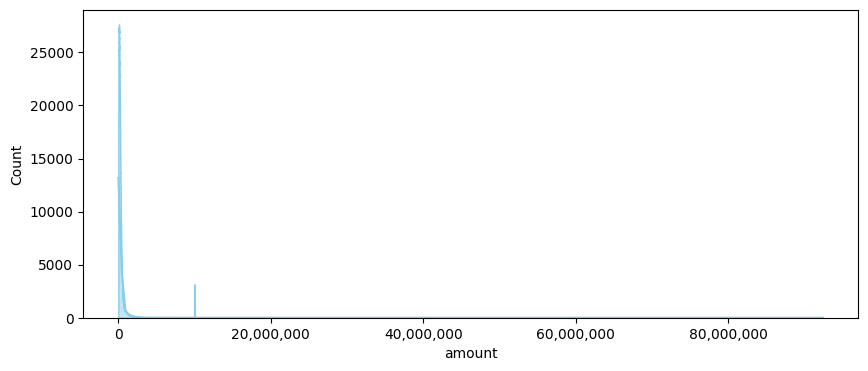

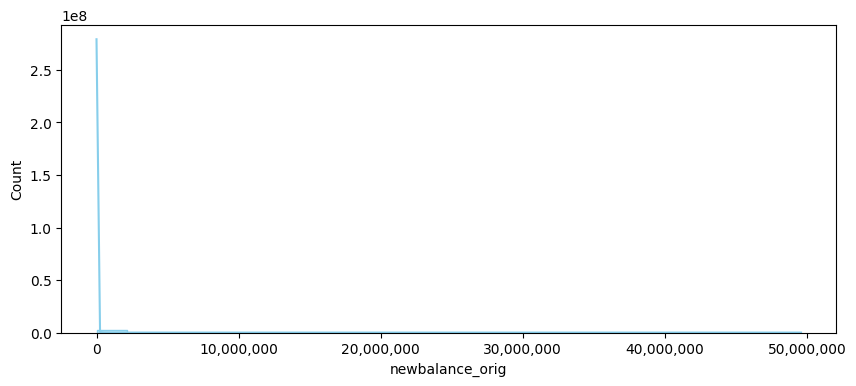

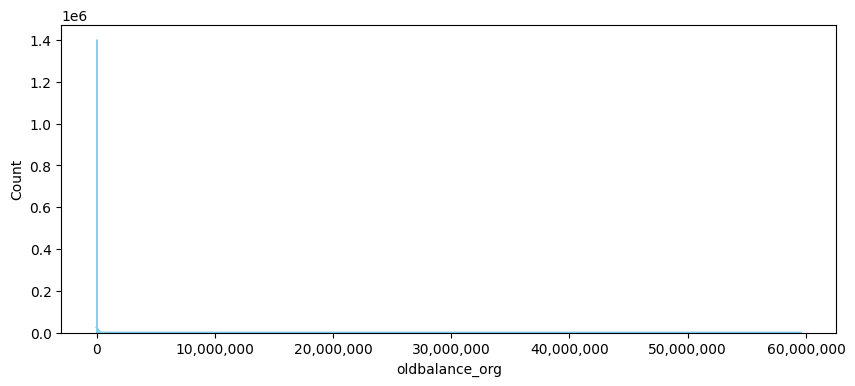

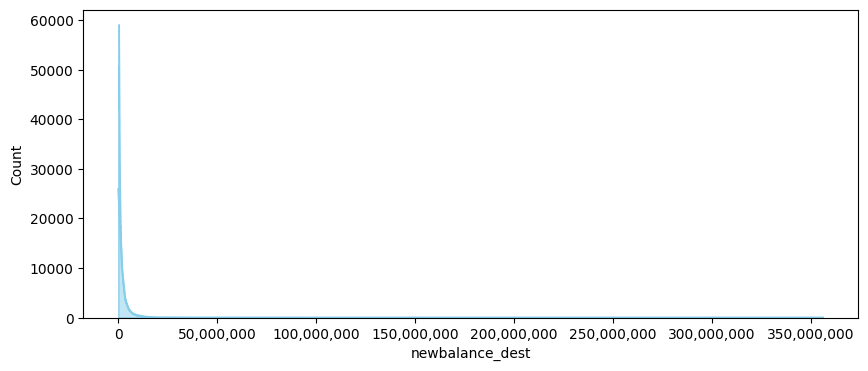

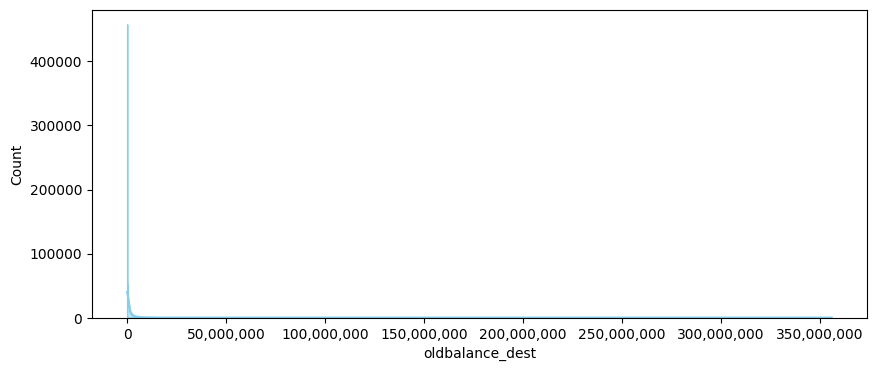

In [ ]:
numeric_cols = ['amount', 'newbalance_orig', 'oldbalance_org', 'newbalance_dest', 'oldbalance_dest']
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins='auto', element='step', color='skyblue')
    plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    plt.show()

**3.4. Постройте таблицы сопряженности (cross-tabulation) для категориальных признаков. (например, зависимость между полом клиента и типом покупок). Рассчитайте долю каждой категории.**

---



**1.** Сравним доли мошенничиских и легальных операций для каждого типа транзакции.

**Результаты:** \
Уровень риска различается почти в 4 раза. Для transfer вероятность мошенничества 0.77%, а для cash_out 0.18%. При этом абсолютная доля мошенничества низкая 0.29%. Следовательно, переводы между клиентами  опаснее, чем операции снятия.


In [140]:
type_crosstab = pd.crosstab(
    index=df['type'],
    columns=df['is_fraud'],
    normalize='index'
) * 100
type_crosstab

is_fraud,False,True
type,,
cash_out,99.82,0.18
transfer,99.23,0.77


**2.** Сравним доли мошеннических и легальных операций по категориям сумм

**Результаты:** \
Платежи более 1млн (very_large) в мошеннических операциях составляют около ~33%, хотя в легальных операциях занимают менее ~5%, что может служить явным индикатором мошенничества. Доля крупных платежей в мошенничиских операциях составляет почти половину ~47%, но при этом для легальных операций это вполне стандартный платеж ~65%. Следовательно, важным признаком для обнаружения мошенничкства является размер платежа.

In [134]:
amount_crosstab = pd.crosstab(
    index=df['amount_category'],
    columns=df['is_fraud'],
    normalize='columns'
) * 100
amount_crosstab

is_fraud,False,True
amount_category,,
micro,0.28,0.65
small,2.56,2.70
medium,27.36,17.53
large,65.17,46.59
very_large,4.63,32.53


**3.** Сравним доли мошеннических и легальных операций по типу рискованных операций

**Результаты:** \
~97.55% всех мошеннических транзакций выполняют полный вывод денег со счёта, при этом в легальных таких операций практически нет. Операции с 0 суммами характернв только для мошеннических операций. Овердрафт операции являются стандартными для клиентов ~90% от всех легальных операций, в мошенничестве всречаются реже. Следоватлеьно стоит обращать особое внимание на платежи с обнулением баланса.

In [135]:
risk_crosstab = pd.crosstab(
    index=df['high_risk'],
    columns=df['is_fraud'],
    normalize='columns'
) * 100
risk_crosstab

is_fraud,False,True
high_risk,,
auto_blocked,0.00,0.20
overdraft,90.10,0.36
partial_debit,9.90,1.77
zero-balance,0.00,97.55
zero-operation,0.00,0.13


**3.5. Выполните проверку гипотез (на выбор). Например, с помощью критерия χ² (хи-квадрат) или t-теста (если изучаются зависимости между двумя группами). Пример гипотезы: «Средний доход мужчин и женщин в датасете статистически отличается».**

---



Проведем проверку гипотезы о связи между суммой операции и мошенничеством с помощью критерия χ²

**Гипотеза:**\
H0: Доля мошенничества одинакова во всех категориях суммы операций.\
H1: Вероятность мошенничества меняется в зависимости от категории суммы транзакции.

**Результаты:** \
p-value < 0.5 значит отвергаем H₀. Есть зависимость между суммой операции и вероятностью мошенничества.



In [ ]:
contingency_table = pd.crosstab(df['amount_category'], df['is_fraud'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'χ²-статистика = {chi2}')
print(f'p-value = {p_value}')
print(f'Степени свободы = {dof}')

χ²-статистика = 14199.404725387409
p-value = 0.0
Степени свободы = 4


**Результаты:** \
Самые больште отклонения между наблюдаемымми случаями мошенничества и ожидаемыми наблюдаются в категориях *very_large* и *micro*.

In [ ]:
expected_df = pd.DataFrame(
    expected,
    index=contingency_table.index,
    columns=contingency_table.columns
)
pd.DataFrame({
    'Наблюдаемое': contingency_table[True],
    'Ожидаемое': expected_df[True],
    'Разница': (contingency_table[True] - expected_df[True])
})

,Наблюдаемое,Ожидаемое,Разница
amount_category,,,
micro,53,22.94,30.06
small,220,209.04,10.96
medium,1429,2228.34,-799.34
large,3798,5307.81,-1509.81
very_large,2652,383.87,2268.13


**3.6. Сделайте выводы по каждому виду статистического анализа. Объясните, как результаты могут использоваться для принятия решений.**

---




**ВЫВОДЫ:**
1.   Согласно описательной статистике средняя сумма транзакций в мошеннических операциях значительно выше, чем в легальных: 1,4 млн против 314 тыс. Для мошеннических операций средний баланс отправителя в десятки раз превышает легальные показатели (~1,6 млн против ~43 тыс.). Были выявлены следующие паттерны. Мошеннические транзакции чаще представляют собой крупные суммы с высокими остатками у отправителей, но часто направлены на нулевые или минимальные балансы получателей. Легальные транзакции в среднем меньше по сумме, с более скромными остатками, и чаще осуществляются между счетами с положительными балансами.
2.   Корреляционный анализ не выявил четкой связи между мошенническими операциями и другими числовыми показателями. Как и ожидалось, балансы счетов и суммы транзакций взаимосвязаны, поскольку при переводе средств баланс изменяется. Наблюдается мультиколлинеарность, так как эти показатели логически зависят друг от друга. Это свидетельствует о том, что для выявления мошенничества важны комбинации признаков, а не отдельные переменные.
3.   Гистограммы и графики KDE для числовых значений показали следующее.Распределения всех признаков обладают положительной асимметрией с плотными пиками при малых значениях и длинными хвостами вправо.Это указывает на то, что большинство операций совершается на относительно небольшие суммы, однако встречаются редкие, но крайне крупные переводы.
4.   Анализ категориальных признаков с помощью таблиц сопряженности позволил сделать следующие выводы. Мошеннические операции в 4 раза чаще встречаются среди операций типа *transfer*, чем *cash_out*. Доля транзакций свыше 1 млн составляет 33% среди мошеннических операций против 5% среди легальных.Доля платежей до 1 млн примерно одинакова (65% против 47%).97,55% мошеннических транзакций приводят к полному обнулению счета отправителя. Только в мошеннических операциях встречаются нулевые балансы после перевода.Овердрафтные платежи являются стандартными для легальных операций.
5.   На основе χ²-теста была обнаружена статистически значимая связь между суммой операции и фактом мошенничества. Вероятность мошенничества варьируется в зависимости от суммы.Категория *very_large* (свыше 1 млн) содержит значительно больше мошеннических транзакций, чем ожидалось.В категории micro повышенная активность может быть связана с тестированием мошеннических схем.

**Статистический анализ подтвердил закономерности, выявленные в ходе исследовательского анализа. Большинство мошеннических операций связано с типом transfer, крупными или очень крупными суммами, а также полным обнулением счета.**






# **4. Графический анализ данных**





**1. Постройте не менее 3 различных диаграмм – библиотека Matplotlib, 2
различных диаграмм – библиотека Seaborn, для наглядного представления ранее
полученных результатов. 2. Настройте диаграммы (оси, сетка, легенда, тики и т.д.) таким образом,чтобы они были читабельны без обращения к данным**

---



В статистическом анализе мы строили таблицы сопряженности для категориальных признаков, чтобы выявит паттерны мошенничесва. Воспользуемся библиотекой Matplotlib, чтобы визулировать связи между категориальными признаками и флагом мошенничества.

**1.** Построим диаграмму "Распределение мошеннических операций по типам транзакций (доли в разрезе каждого типа)". \
Показывает, какой процент каждого типа операций (CASH_IN, CASH_OUT, TRANSFER и т.д.) является мошенническим.

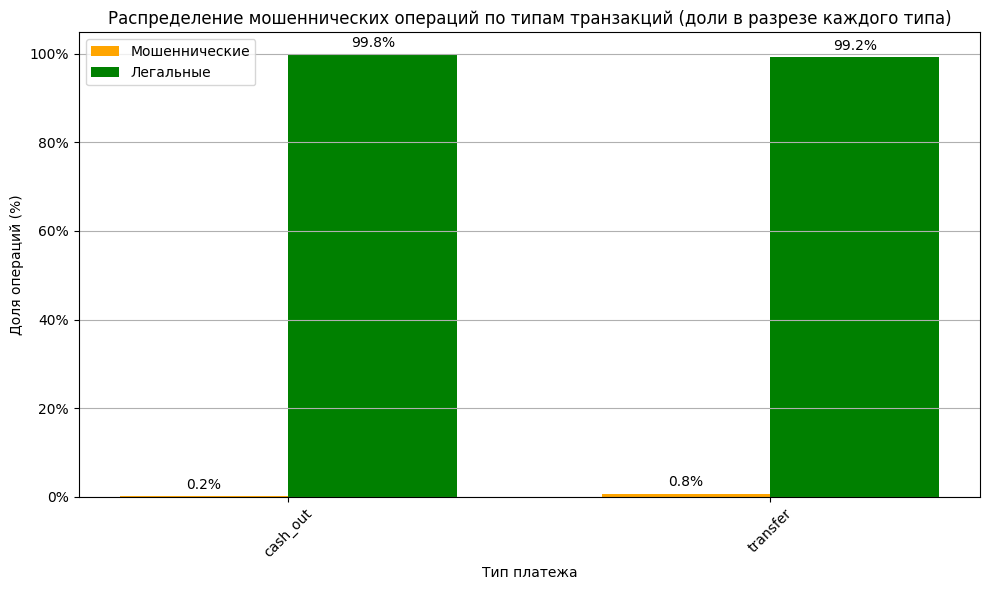

In [158]:
type_crosstab.columns = ['Легальные', 'Мошеннические']
categories = type_crosstab.index.tolist()
x = range(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar([i - 0.35/2 for i in x], type_crosstab['Мошеннические'], 0.35, label='Мошеннические', color='orange')
bars2 = ax.bar([i + 0.35/2 for i in x], type_crosstab['Легальные'], 0.35, label='Легальные', color='green')
ax.bar_label(bars1, fmt='%.1f%%', padding=3)
ax.bar_label(bars2, fmt='%.1f%%', padding=3)

ax.set_title('Распределение мошеннических операций по типам транзакций (доли в разрезе каждого типа)')
ax.set_xlabel('Тип платежа')
ax.set_ylabel('Доля операций (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.yaxis.set_major_formatter(PercentFormatter())
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

**2.** Построим диаграмму "Распределение мошеннических и легальных операций по категориям сумм". \
Показывает, как распределяются доли разных категорий сумм (micro, small и т.д.) среди всех мошеннических и всех легальных операций.

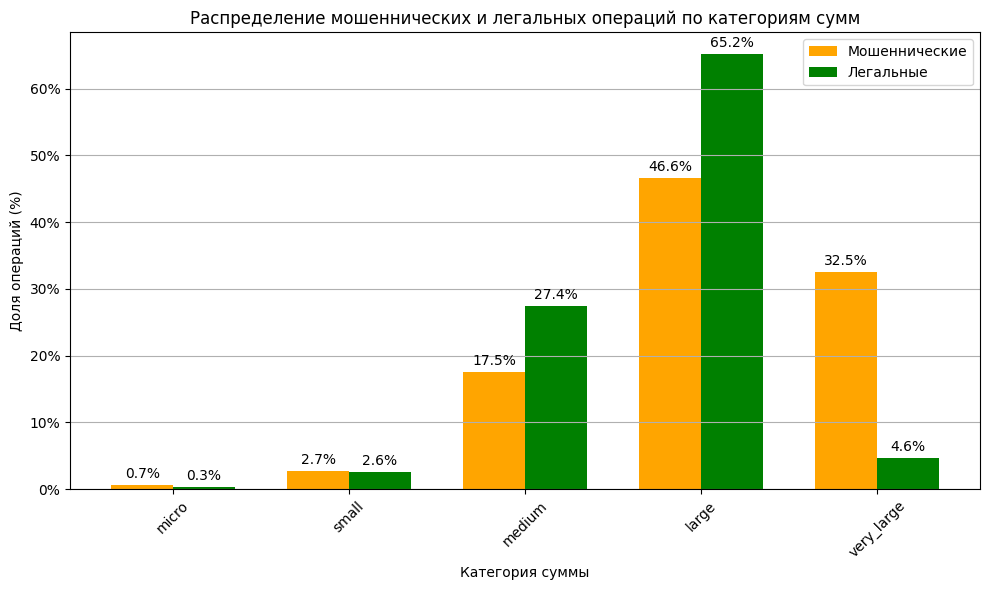

In [157]:
amount_crosstab.columns = ['Легальные', 'Мошеннические']
categories = amount_crosstab.index.tolist()
x = range(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar([i - 0.35/2 for i in x], amount_crosstab['Мошеннические'], 0.35, label='Мошеннические', color='orange')
bars2 = ax.bar([i + 0.35/2 for i in x], amount_crosstab['Легальные'], 0.35, label='Легальные', color='green')
ax.bar_label(bars1, fmt='%.1f%%', padding=3)
ax.bar_label(bars2, fmt='%.1f%%', padding=3)

ax.set_title('Распределение мошеннических и легальных операций по категориям сумм')
ax.set_xlabel('Категория суммы')
ax.set_ylabel('Доля операций (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.yaxis.set_major_formatter(PercentFormatter())
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

**3.** Построим диаграмму "Доля операций по категориям изменения баланса для легальных и мошеннических транзакций". \
Показывает, как распределяются категории изменения баланса (обнуление, овердрафт, частичное списание и др.) среди легальных и мошеннических транзакций.

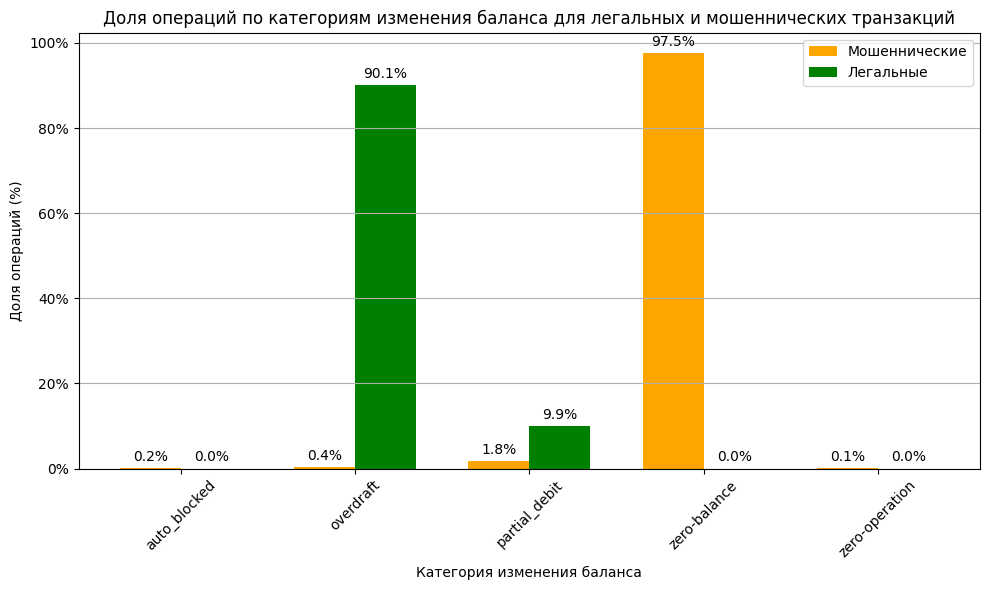

In [159]:
risk_crosstab.columns = ['Легальные', 'Мошеннические']
categories = risk_crosstab.index.tolist()
x = range(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar([i - 0.35/2 for i in x], risk_crosstab['Мошеннические'], 0.35, label='Мошеннические', color='orange')
bars2 = ax.bar([i + 0.35/2 for i in x], risk_crosstab['Легальные'], 0.35, label='Легальные', color='green')
ax.bar_label(bars1, fmt='%.1f%%', padding=3)
ax.bar_label(bars2, fmt='%.1f%%', padding=3)

ax.set_title('Доля операций по категориям изменения баланса для легальных и мошеннических транзакций')
ax.set_xlabel('Категория изменения баланса')
ax.set_ylabel('Доля операций (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.yaxis.set_major_formatter(PercentFormatter())
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

На основании выявленных закономерностей в поведении клиентов, проанализиуем взаимосвязь сразу между тремя категориальными признаками: типом транзакции, rатегорией суммы перевода, характером изменения баланса.
Для визуализации этих взаимосвязей отдельно для легальных и мошеннических операций мы воспользуемся возможностями библиотеки Seaborn.

**1.** Построим кластерную карту для мошенничискмх операций.

<Figure size 1400x1000 with 0 Axes>

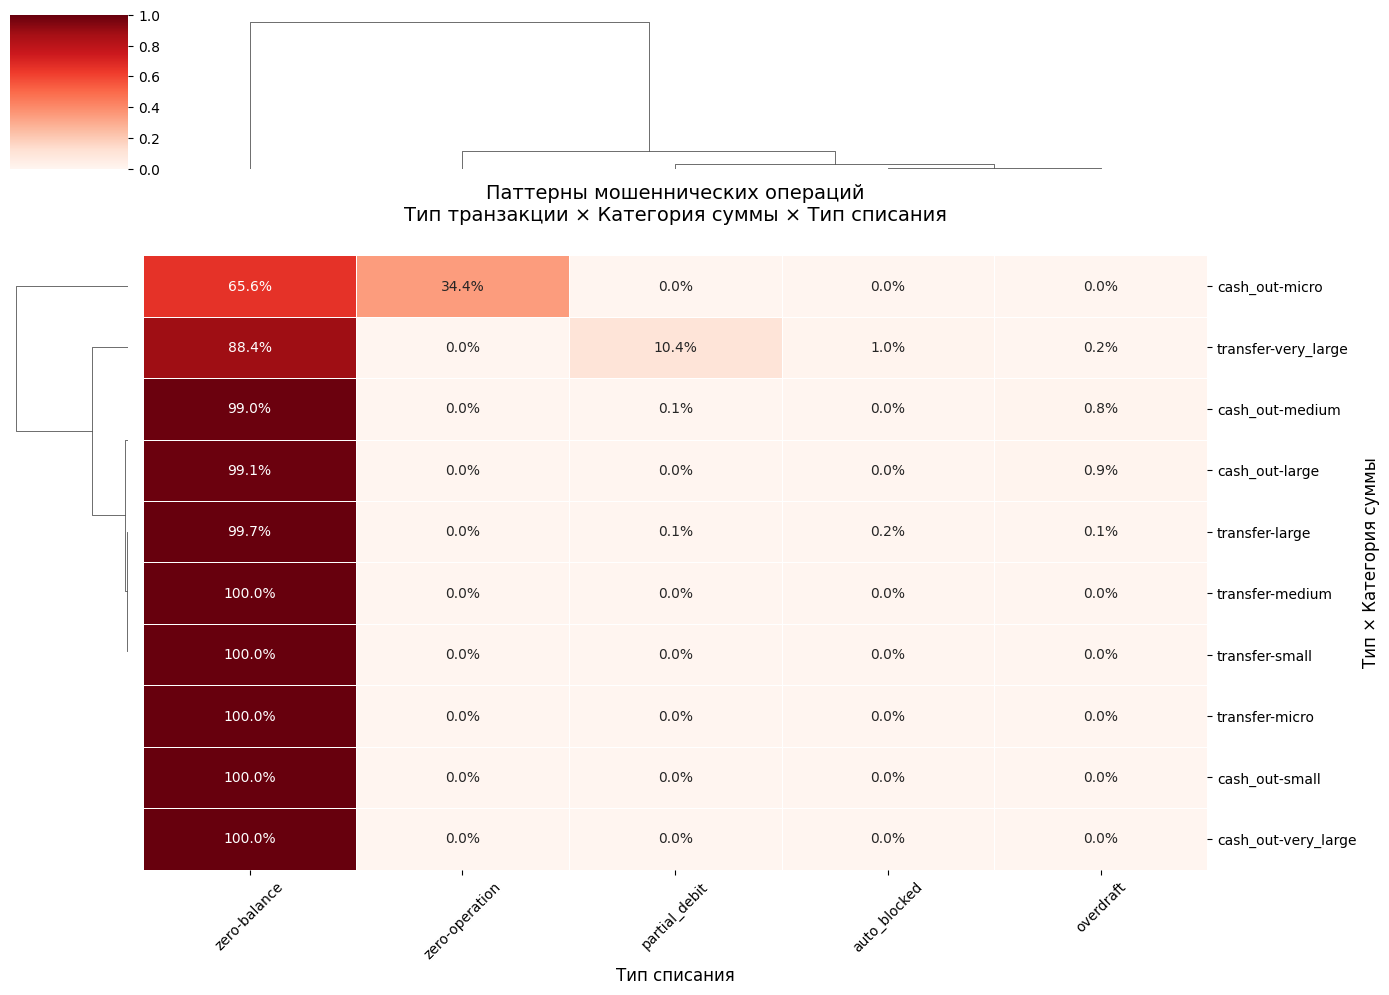

In [176]:
plt.figure(figsize=(14, 10))
scam_clustermap = sns.clustermap(
    pd.crosstab(
        index=[df_scam['type'], df_scam['amount_category']],
        columns=[df_scam['high_risk']],
        normalize='index'
    ),
    metric='euclidean',
    method='complete',
    cmap='Reds',
    figsize=(14, 10),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(.02, .8, .03, .1),
    linewidths=.5,
    annot=True,
    fmt='.1%'
)

scam_clustermap.ax_heatmap.set_title(
    'Паттерны мошеннических операций\nТип транзакции × Категория суммы × Тип списания',
    pad=25, fontsize=14
)
scam_clustermap.ax_heatmap.set_xlabel('Тип списания', fontsize=12)
scam_clustermap.ax_heatmap.set_ylabel('Тип × Категория суммы', fontsize=12)
plt.setp(scam_clustermap.ax_heatmap.get_xticklabels(), rotation=45)
plt.setp(scam_clustermap.ax_heatmap.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

**2.** Построим кластерную карту для легальных операций.

<Figure size 1400x1000 with 0 Axes>

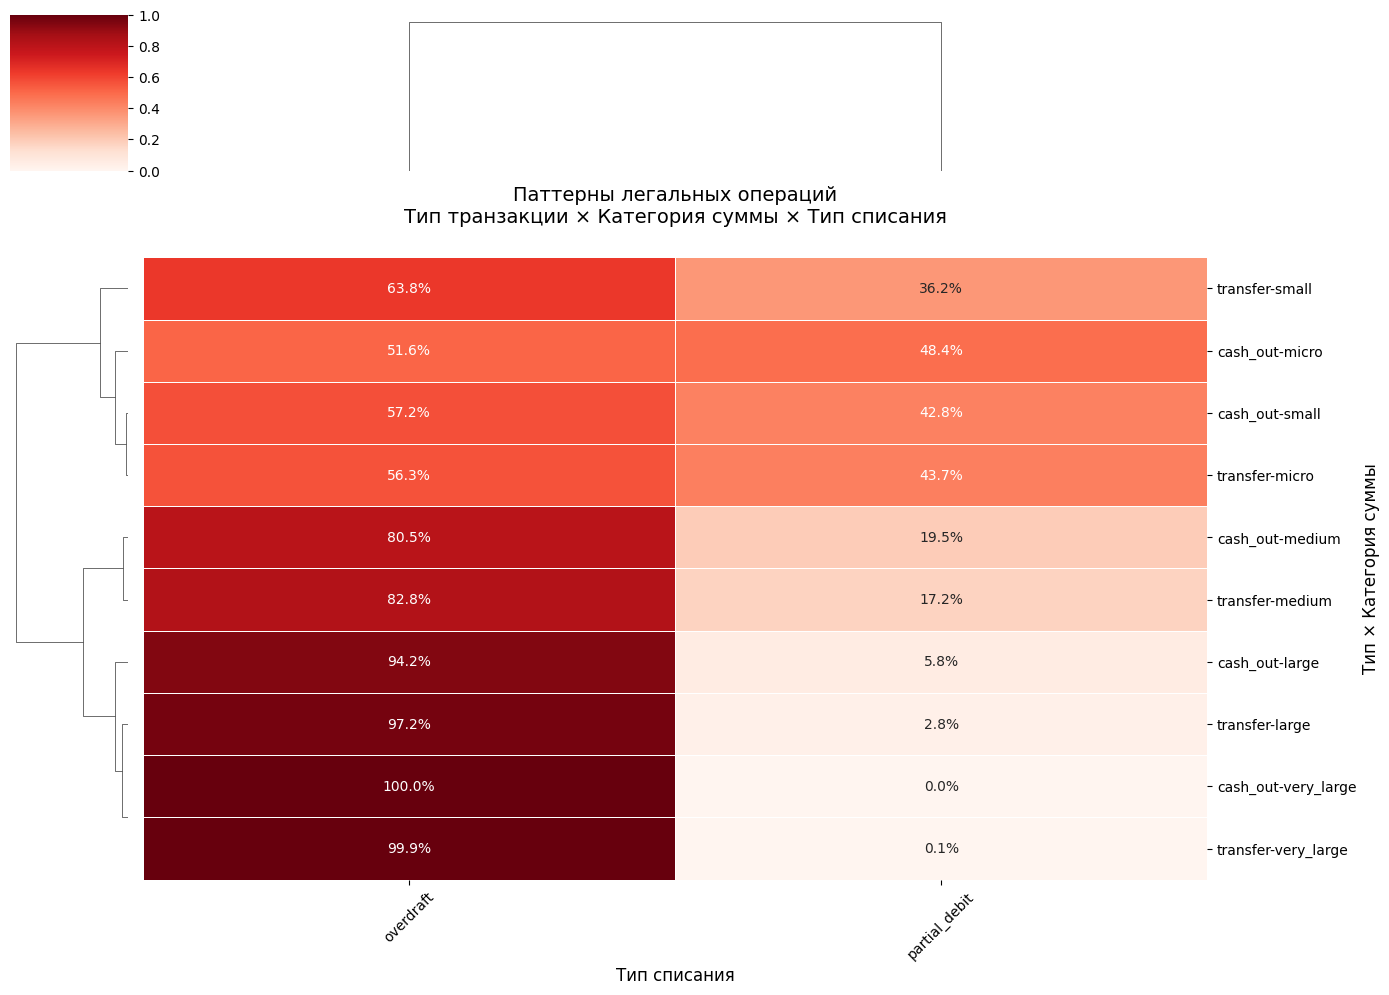

In [178]:
plt.figure(figsize=(14, 10))
scam_clustermap = sns.clustermap(
    pd.crosstab(
        index=[df_legal['type'], df_legal['amount_category']],
        columns=[df_legal['high_risk']],
        normalize='index'
    ),
    metric='euclidean',
    method='complete',
    cmap='Reds',
    figsize=(14, 10),
    dendrogram_ratio=(.1, .2),
    cbar_pos=(.02, .8, .03, .1),
    linewidths=.5,
    annot=True,
    fmt='.1%'
)

scam_clustermap.ax_heatmap.set_title(
    'Паттерны легальных операций\nТип транзакции × Категория суммы × Тип списания',
    pad=25, fontsize=14
)
scam_clustermap.ax_heatmap.set_xlabel('Тип списания', fontsize=12)
scam_clustermap.ax_heatmap.set_ylabel('Тип × Категория суммы', fontsize=12)
plt.setp(scam_clustermap.ax_heatmap.get_xticklabels(), rotation=45)
plt.setp(scam_clustermap.ax_heatmap.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

**3. На основе полученных данных составьте «портрет» типичного потребителя в рамках исследуемой предметной области.**

---




**Портрет легальных и мошеннических операций выявленный на основе анализа данных:**
*   Типичная мошенническая транзакция, как правило, представляет собой операцию
типа TRANSFER (перевод с одного счёта на другой) или CASH_OUT (снятие наличных средств). В таких случаях наиболее характерной чертой является высокая или аномально высокая сумма операции, которая зачастую приближается к полному балансу отправителя. Это свидетельствует о намерении вывести или перевести максимум возможных средств за одну попытку. Также встречаются аномальные попытки провести 0 операции.
*   Легальные операции в типах TRANSFER и CASH_OUT, как правило, осуществляются на средние или крупные суммы, однако при этом поведение клиента отличается от мошеннических сценариев. В большинстве случаев такие транзакции сопровождаются частичным выводом средств, при котором на счёте отправителя остаётся положительный остаток, или же происходят в рамках овердрафтных платежей, когда клиент использует доступный кредитный лимит.






# **Выводы и рекомендации**

В ходе работы по анализу оплайнт платежей с уелью выявления мошенничиских транзакций была проведена следущие этапы аналитической работы:

1.   Предобработка данных. Была выполнена очистка, унифицированы названия признаков и оптимизированы типы данных для повышения эффективности последующей обработки.
2.   Исследовательский анализ данных. Исследование структуры датасета показало сильный дисбаланс в данных. Выяснилось, что подавляющее большинство мошеннических транзакций связано с операциями TRANSFER и CASH_OUT. Были созданы новые категориальные столбцы.Суммы операций были распределены по категориям для упрощения анализа и сравнения, для этого был создан новый столбец amount_category. Были выявлены первые закономерности, характерные именно для мошеннических транзакций, на основе этих наблюдений был сформирован новый столбец high_risk, описывающий типы операций с повышенным уровнем риска.
3.   Статистический анализ данных. Статистический анализ данных подтвердил гипотезы, выдвинутые в ходе исследования, и подтвердил выявленные ранее закономерности мошеннических операций, отмеченные в исследовательском анализе. Было выявлено, что мошеннические транзакции резко выделяются крупными суммами (в среднем1.4млн против 314тыс у легальных).
4.   Графический анализ данных.В ходе графического анализа были визуализированы обнаруженные закономерности и создана характерная картина легальных и мошеннических транзакций.

*Бизнес-задача, связанная с выявлением аномалий и характерных паттернов мошеннических операций, была успешно решена. Удалось определить, что операции типа TRANSFER и CASH_OUT наиболее уязвимы, а ключевыми признаками мошенничества являются полное списание средств с баланса отправителя и очень большие суммы операций.  Также было выявлено, что текущая система флагов не позволяет своевременно реагировать на мошенничество и нуждается в пересмотре.*

**Практических рекомендации для бизнеса:**

1.   Обязательно обновить существующую систему обнаружения мошенничества, поскольку текущая показывает низкую эффективность и почти не выявляет подозрительные операции(всего 16 помеченных случаев). Нужно доработать алгоритмы, например, учитывая: переводы на новые/редко используемые счета, резкое увеличение активности после долгого бездействия аккаунта. Особое внимание следует уделить пользователям и операциям с нулевой суммой (0-транзакциям), которые могут свидетельствовать о тестировании мошеннических схем или попытках обхода защиты.
2.   Внедрить автоматические правила для блокировки или верификации подозрительных операций: транзакции типа TRANSFER или CASH_OUT, где весь баланс списывается,а суммы операций свыше миллиона должны требовать дополнительной проверки (SMS/подтверждение в приложении).

**Возможные пути дальнейшего анализа:**

*   Рекомендуется расширить набор используемых данных, включая такие параметры, как дата создания счетов, дата и частота последних операций, а также больше персональных сведений о клиентах. Это позволит лучше понимать, какие социальные группы являются более уязвимыми и нуждаются в особой защите. Для повышения эффективности обнаружения мошенничества стоит провести углублённый анализ временных паттернов — например, определить часы суток или дни недели с наибольшей активностью мошенников — а также изучить сетевые связи между пользователями, что поможет выявлять сложные и организованные схемы мошенничества.
*   Кроме того, необходимо разработать и обучить модели машинного обучения, способные автоматически классифицировать транзакции с учётом дисбаланса классов, что значительно повысит точность и своевременность обнаружения подозрительных операций.